# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Loading the dataset

In [2]:
mnist= tf.keras.datasets.mnist

# Dividing the images and their outputs into x_train and x_test sets

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Cheking the data set images, which needed to be identified by the neural network

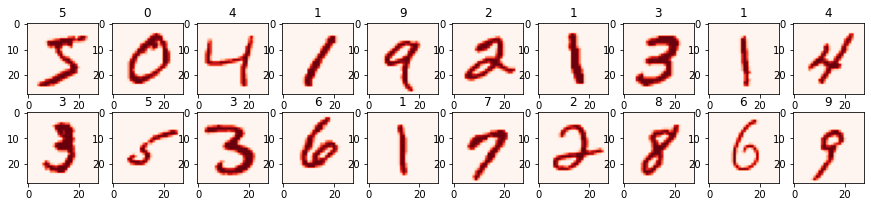

In [4]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='Reds')
  ax.set_title(y_train[i])

# Printing the data images into metrics form

In [5]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

# Normalizing the matrix array of number images

In [6]:
xtrain = x_train/255.0
xtest = x_test/255.0

# Flattening the 2-dimensional array into one dimensional array or a single column; which will behave as 1st inpur layer for neural network

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Using of AdamOptimizer

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Fitting of the training data into the model for 5 iterations

In [10]:
model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2539 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9867


# Fitting of the training data into the model for 9 iterations

In [11]:
model.fit(xtrain,y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9890
Epoch 2/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0274 - accuracy: 0.9917
Epoch 3/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0216 - accuracy: 0.9934
Epoch 4/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0151 - accuracy: 0.9955
Epoch 6/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0137 - accuracy: 0.9953
Epoch 7/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0106 - accuracy: 0.9968
Epoch 8/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0097 - accuracy: 0.9970
Epoch 9/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9973


# 99% Accuracy achieved with 9 iterations

In [12]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 22.1456 - accuracy: 0.9780
[22.145570755004883, 0.9779999852180481]


# 97 % of total accuracy of our neural network has been achieved

In [13]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 5.2656 - accuracy: 0.9888 - val_loss: 1.7591 - val_accuracy: 0.9955
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 2.0019 - accuracy: 0.9941 - val_loss: 1.8744 - val_accuracy: 0.9962
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.8270 - accuracy: 0.9947 - val_loss: 2.3915 - val_accuracy: 0.9943
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.7835 - accuracy: 0.9951 - val_loss: 3.8836 - val_accuracy: 0.9913
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.9824 - accuracy: 0.9952 - val_loss: 3.6905 - val_accuracy: 0.9917
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.8153 - accuracy: 0.9950 - val_loss: 4.6869 - val_accuracy: 0.9897
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.6229 - accuracy: 0.9950 - val_loss: 3.1397 - val_accuracy:

# Plotting Accuracy of Model

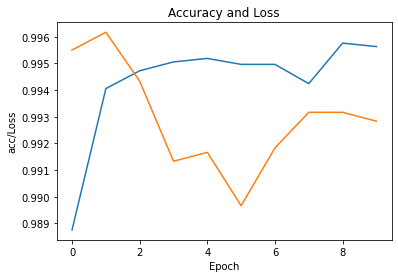

In [14]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()


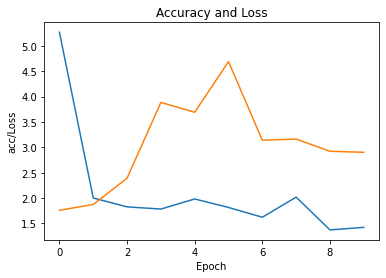

In [15]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()


# Testing Our Model

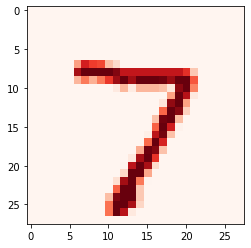

In [16]:
plt.imshow(np.squeeze(x_test[0]),cmap="Reds")

In [17]:
prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

7


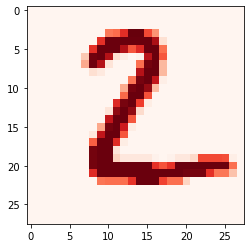

In [18]:
plt.imshow(np.squeeze(x_test[1]),cmap="Reds")

In [19]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

2
